In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = '/Users/arnav/Downloads/breast-cancer-wisconsin.data.txt'

In [ ]:
df=pd.read_csv(data, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
#Feature Engineering:
#Renaming of our Features:
col_names = ['Id','Clump_thickness','Uniformity_Cell_Size','Uniformity_Cell_Shape','Marginal_Adhesion',
            'Single_Epithelial_Cell_Size', 'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

df.columns=col_names

In [ ]:
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
#Frequency Dist. of Values in Variables:
for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

In [ ]:
#Convert Categorical to Numerical:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
correlation = df.corr()

In [ ]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

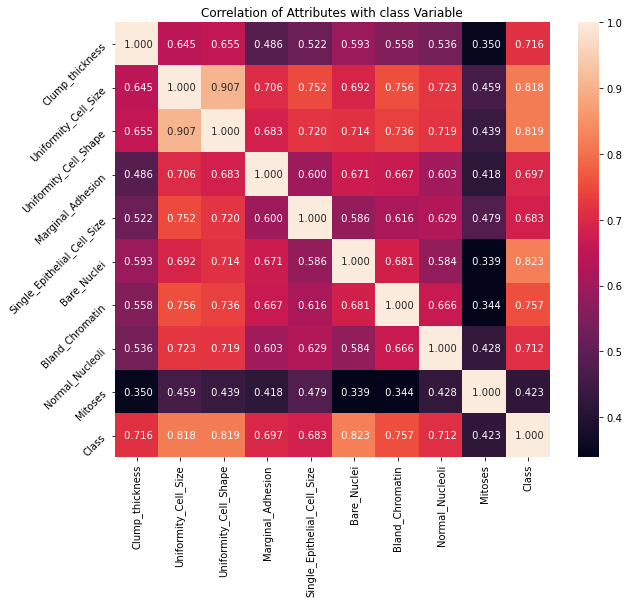

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with class Variable')

a = sns.heatmap(correlation, square=True, annot=True, fmt= ' .3f',linecolor='white')

a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=45)

plt.show()

In [ ]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((559, 9), (140, 9))

In [ ]:
for df1 in [X_train,X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace = True)

In [ ]:

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [ ]:
#Feature Scaling:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
#KNN:
from sklearn.neighbors import K  NeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
#I need to predict the probabilities:
#1. Prob. of getting Benign Cancer: OP as 2.
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 1.     

In [ ]:
#I need to predict the probabilities:
#1. Prob. of getting Malignant Tumour: OP as 4.
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 0.     

In [ ]:
#Check Accuracy Scores:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.9643


In [ ]:
print('Model accuracy score:',format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.9642857142857143


In [ ]:
#Comparison of train-set & test-set accuracies:
y_pred_train = knn.predict(X_train)

In [ ]:
print('Training set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training set accuracy score: 0.9821


In [ ]:
#Realtime of Over & under fit of data:
print('Training set score: {0:0.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {0:0.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9643


In [ ]:
# No chance of overfitting. 

In [ ]:
#Null Accuracy:
#Checkup on class dist.
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [ ]:
null_accuracy = (85/(85+55))

In [ ]:
print('Null Accuracy score: {0:0.4f}'.format(null_accuracy))

Null Accuracy score: 0.6071


In [ ]:
#KNN = 5: Model Instatntiation:
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Fitting the line of best curve:
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#predict on test set:
y_pred_5= knn_5.predict(X_test)

In [ ]:
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9643


In [ ]:
#KNN = 6: Model Instatntiation:
knn_6 = KNeighborsClassifier(n_neighbors=6)
#Fitting the line of best curve:
knn_6.fit(X_train, y_train)
#predict on test set:
y_pred_6= knn_6.predict(X_test)
print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9643


In [ ]:
 #KNN = 7: Model Instatntiation:
knn_7 = KNeighborsClassifier(n_neighbors=7)
#Fitting the line of best curve:
knn_7.fit(X_train, y_train)
#predict on test set:
y_pred_7= knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9714


In [ ]:
#KNN = 8: Model Instatntiation:
knn_8 = KNeighborsClassifier(n_neighbors=8)
#Fitting the line of best curve:
knn_8.fit(X_train, y_train)
#predict on test set:
y_pred_8= knn_8.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=5 : 0.9714


In [ ]:
#KNN = 9: Model Instatntiation:
knn_9 = KNeighborsClassifier(n_neighbors=9)
#Fitting the line of best curve:
knn_9.fit(X_train, y_train)
#predict on test set:
y_pred_9= knn_9.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=5 : 0.9714


In [ ]:
#KNN = 10: Model Instatntiation:
knn_10 = KNeighborsClassifier(n_neighbors=10)
#Fitting the line of best curve:
knn_10.fit(X_train, y_train)
#predict on test set:
y_pred_10= knn_10.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_10)))

Model accuracy score with k=5 : 0.9714


In [ ]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix\n\n", cm)



print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 3 52]]

True Positives(TP) =  83

True Negatives(TN) =  52

False Positives(FP) =  2

False Negatives(FN) =  3


In [ ]:
# Print the Confusion Matrix with k =7 and slice it into four pieces

cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7,columns=['Actual Positive:1','Actual Negative: 0'],index=['Predict Positive:1','Predict Negative:0'])

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

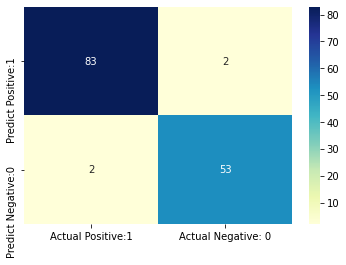

In [ ]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')